# WeatherPy
----
1 Temperature increases closest to the equator (0) and decreases the further from the equator. 
2 Humidity seems to be scattered with no visible pattern other than a little clustering between 60-80 degrees latitude.
3 Cloudiness has an even distribution across all latitudes.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

dataframe = []

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()

#get data from response and assign variables
    try: 
        lat = response['coord']['lat']
        lon = response['coord']['lon']
        temp = response['main']['temp_max']
        humid = response['main']['humidity']
        cloudy = response['clouds']['all']
        windy = response['wind']['speed']
        
        dataframe.append({'lat': lat, 'lon': lon, 'temp': temp, 'humid': humid, 'cloudy': cloudy, 'windy': windy })
        
    except: 
        pass
        


#even though there are errors, the next lines of code still run 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(dataframe)
df.head()

,lat,lon,temp,humid,cloudy,windy
0,50.68,156.12,18.63,89,96,20.78
1,69.38,178.42,8.47,95,100,11.14
2,-9.80,-139.03,81.55,75,4,22.12
3,-21.20,-175.20,80.33,86,100,14.36
4,19.73,-155.09,73.99,94,100,3.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature v Latitude')

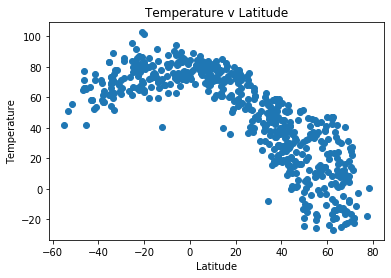

In [17]:
temp2 = df['temp']
lat2 = df['lat']
plt.scatter(lat2, temp2)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature v Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity v Latitude')

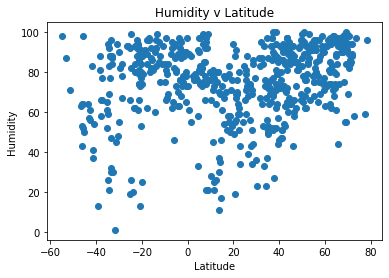

In [16]:
humid2 = df['humid']
plt.scatter(lat2, humid2)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity v Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness v Latitude')

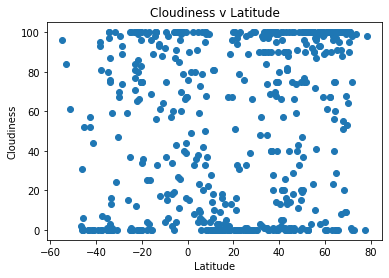

In [18]:
cloudy2 = df['cloudy']
plt.scatter(lat2, cloudy2)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness v Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed v Latitude')

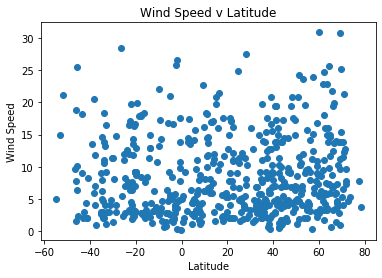

In [19]:
windy2 = df['windy']
plt.scatter(lat2, windy2)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed v Latitude")